# Preprocessing

## Reading CSV

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [204]:
data = pd.read_csv('sample_output.csv')

## Understanding Dataset

In [205]:
data.shape

(10000, 18)

In [206]:
data.head(3)

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,http://sub22b.jelastic.regruhosting.ru/acesso/...,Phishing.Database,phishing,62,False,4.203093,False,0.039216,4,0,0,0,False,2,0.606254,False,NaN,NaN
1,https://cherry-609d.hakeem1115.workers.dev/63f...,Phishing.Database,phishing,79,False,4.747960,False,0.634146,3,0,5,0,False,2,0.438186,False,"{'domain_name': None, 'registrar': None, 'whoi...",NaN
2,http://secureid-auth5b.serveirc.com/navyfedera...,Phishing.Database,phishing,62,False,4.453623,False,0.040000,4,0,1,1,False,1,0.606254,True,"{'domain_name': 'SERVEIRC.COM', 'registrar': '...",8804.0


In [207]:
data.tail(3)

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
9997,mst.org.br,Majestic,legitimate,10,False,2.921928,False,0.000000,2,0,0,0,False,0,0.464386,False,"{'domain_name': 'mst.org.br', 'registrant_name...",9872.0
9998,cs532-2037.meraki.com,Cisco-Umbrella,legitimate,21,False,3.916127,False,0.636364,2,0,1,0,False,1,0.323078,False,"{'domain_name': 'MERAKI.COM', 'registrar': 'Ma...",7916.0
9999,mainediner.com,Majestic,legitimate,14,False,3.235926,False,0.000000,1,0,0,0,False,0,0.271954,False,"{'domain_name': 'MAINEDINER.COM', 'registrar':...",10497.0


In [208]:
data.dtypes

url                    object
source                 object
label                  object
url_length              int64
starts_with_ip           bool
url_entropy           float64
has_punycode             bool
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digits        bool
subdomain_count         int64
nan_char_entropy      float64
has_internal_links       bool
whois_data             object
domain_age_days       float64
dtype: object

## Dropping variables

Dropping variables that are not IV

In [209]:
# The url is unnecessary as all the informations about the url are in the followings variables
# whois_data is unnecessary as its content is summarized in the other IV variables
# domain_age_data is unnecessary has it won't help the model to determine the TV

data = data.drop(['url', 'whois_data', 'domain_age_days'], axis=1) # axis=1 necessary ?


Dropping datas totally definning the model

In [210]:
# The source colums determines whether the url is legitimate or not
data = data.drop('source', axis=1)


In [211]:
data.shape

(10000, 14)

## Understanding clean dataset

In [212]:
data.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.788100,3.911319,0.115826,2.21580,0.01090,0.745000,0.038500,0.786900,0.464863
std,68.050433,0.640732,0.239825,2.39416,0.11306,1.878225,0.348755,1.040767,0.187817
min,5.000000,1.918296,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.071456
25%,17.000000,3.448513,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.306397
50%,30.000000,3.920869,0.000000,2.00000,0.00000,0.000000,0.000000,1.000000,0.415452
75%,53.000000,4.334118,0.133333,3.00000,0.00000,1.000000,0.000000,1.000000,0.616195
max,2631.000000,5.963848,5.000000,148.00000,4.00000,113.000000,12.000000,13.000000,1.429613


In [213]:
data.isnull().sum()

label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
dtype: int64

In [214]:
data.dtypes

label                  object
url_length              int64
starts_with_ip           bool
url_entropy           float64
has_punycode             bool
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digits        bool
subdomain_count         int64
nan_char_entropy      float64
has_internal_links       bool
dtype: object

## Class Balancing
Our TV is labal. This data set is already balanced. It is a binary dataset.

In [215]:
data.isnull().sum()

label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
dtype: int64

label
phishing      5000
legitimate    5000
Name: count, dtype: int64

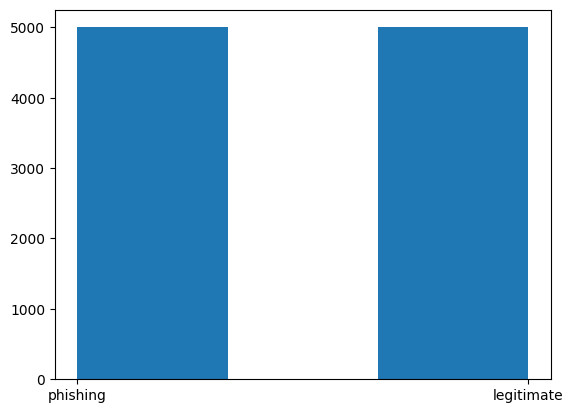

In [216]:
plt.hist(data['label'], density=False, bins= 3 )
data['label'].value_counts()

## Label Encoding / Factorizing

In [220]:
# WHY DONT WE USE GETDUMMIES ???
# OR OneHotEncoder from SKLEARN

In [217]:
# 0 is for legitimate url, 1 for phishing websites
data['label'] = pd.factorize(data['label'])[0] #what is the use of [0]??

data

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links
0,0,62,False,4.203093,False,0.039216,4,0,0,0,False,2,0.606254,False
1,0,79,False,4.747960,False,0.634146,3,0,5,0,False,2,0.438186,False
2,0,62,False,4.453623,False,0.040000,4,0,1,1,False,1,0.606254,True
3,0,24,False,3.970176,False,0.000000,1,0,0,0,False,0,0.680827,False
4,0,69,False,4.548398,False,0.441860,2,0,0,0,True,1,0.474778,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,25,False,3.943465,False,0.100000,2,0,1,0,False,1,0.291508,False
9996,1,11,False,2.663533,False,0.000000,2,0,0,0,False,0,0.447169,False
9997,1,10,False,2.921928,False,0.000000,2,0,0,0,False,0,0.464386,False
9998,1,21,False,3.916127,False,0.636364,2,0,1,0,False,1,0.323078,False


## Assign IV and TV

In [218]:
X = data.drop('label', axis = 1) #IV
Y = data['label'] #TV

## Data Split / Model Building

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [236]:
X_test.head(5)
# or X_train[0:5]

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links
9953,10,False,3.121928,False,0.000000,1,0,1,0,False,0,0.332193,False
3850,39,False,4.015921,False,0.100000,1,0,0,0,True,0,0.608011,False
4962,97,False,4.778498,False,0.641509,3,0,1,0,False,1,0.514324,False
3886,27,False,4.060262,False,0.150000,1,0,0,0,True,0,0.630354,False
5437,10,False,2.646439,False,0.000000,2,0,0,0,False,0,0.464386,False


In [237]:
Y_test.head()

9953    1
3850    0
4962    0
3886    0
5437    1
Name: label, dtype: int64

In [238]:
Y_test.shape # 0.2 of the data set

(2000,)

## KNN

In [240]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [243]:
# ATTANTION CECI EST UN ENORME COPIER COLLER IL SAGIRAI DE COMPRENDRE POUR JUGER CE SCRIPT

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print("KNN - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(Y_test, y_pred))

KNN - Accuracy: 96.700.

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1021
           1       0.97      0.96      0.97       979

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



### ANALYSE THE RESULTS : 
PLEASE DO SO

## Confusion Matrix

In [245]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[990  31]
 [ 35 944]]


Text(0.5, 1.0, 'Confusion Matrix')

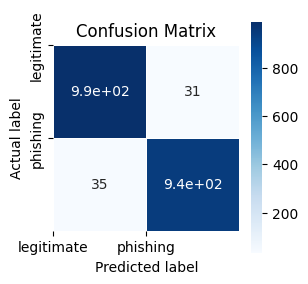

In [255]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues')

plt.xticks([0, 1], ['legitimate', 'phishing'])
plt.yticks([0, 1], ['legitimate', 'phishing'])

plt.xlabel('Predicted label')
plt.ylabel('Actual label')



plt.title("Confusion Matrix", size = 12)